In [1]:
### Survival of Titanic Passengers
## Objectives:
## 1): Started with Data Exploration, performed missing data check and learned which features are important
## 2): Converted categorical features into numeric ones
## 3): Built a classifier to predict survival
## 4): Evaluated the model performance using the classification report


###Import all necessary libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
## Import warnings library so that code ignores warning when running but will notify you when a warning appears
## without interrupting the code running
import warnings




In [2]:
### Importing the CSV with the dataset
df_train = pd.read_csv('train.csv')
### printing the shape of the dataset (rows,columns); Data Exploration
df_train.shape

(891, 12)

In [3]:
### Data Exploration
### showing the boolean values of how many people survived and how many didnt survive
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
### Shows the sum of all null values per category
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.shape

(891, 12)

In [9]:
### Dropping column values and reducing the null sum
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
### creating a function in order to better use the data
### function that approximates the age and passenger class 
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [16]:
df_train['Age'] = df_train[['Age','Pclass']].apply(age_approx, axis=1)

In [17]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [20]:
### Dropping the null values to clean the data up
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [21]:
### Checking the Data types of each variable
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [22]:
### Creating dummies into to convert categorical features into numerical features
df_train_dummied = pd.get_dummies(df_train,columns=["Sex"])

In [23]:
df_train_dummied = pd.get_dummies(df_train_dummied,columns=["Embarked"])

In [26]:
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

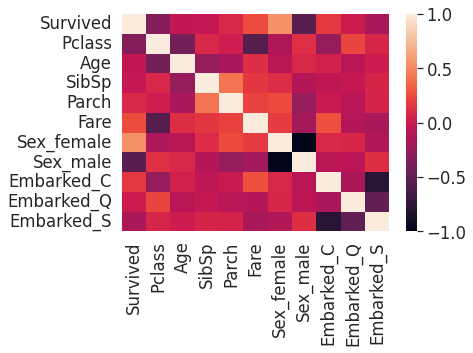

In [27]:
###plotting the dummy variable data into a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

In [28]:
### Finalize the preparation of the data by grouping features that will be used in the train and test sets
used_features = ["Pclass","Age","SibSp","Parch","Sex_female", "Sex_male",
                "Embarked_C","Embarked_Q","Embarked_S"]

X = df_train_dummied[used_features].values
y = df_train_dummied['Survived']

In [29]:
### Prepare the training and testing sets for the X and y features along with the parameters of the test size
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
### Explore the dimensional sizes of each set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [37]:
### Run a Logistic Regression model since the objective is to ultimately determine a Boolean outcome:
### Whether the passenger survived or did not survived;
### Make sure to set the maximum iterations to at least 1000 for the model 
### to fully run due to the Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm ('lbfgs') base limit
### for output size not being enough to resolve this model for this project currently
LogReg = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

In [38]:
LogReg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
y_pred = LogReg.predict(X_test)

In [40]:
### Check the validilty of your model by running confusion matrix to measure how confused your model gets
### when it runs the data
metrics.confusion_matrix(y_test,y_pred)

array([[143,  23],
       [ 22,  79]])

In [41]:
### Checking the accuracy score of the Y test & prediction sets 
metrics.accuracy_score(y_test,y_pred)

0.8314606741573034

In [43]:
len(X_test)

267

In [44]:
### print the classification reports to check Accuracy, Macro & Weighted Averages over 
### Precision, Recall, F1-score, and Support scores of the Y test & prediciton sets
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [45]:
## Check the Coefficients in the model
LogReg.coef_

array([[-1.04183115, -0.0398653 , -0.2423885 , -0.04062015,  1.19389228,
        -1.19467183,  0.34933326, -0.03732589, -0.31278692]])

In [46]:
### Check where the intercept is at in the model
LogReg.intercept_

array([3.65601228])

In [47]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [48]:
### Run the probability prediction on the X test set in the Logistic Regression Model
LogReg.predict_proba(X_test) ### first column (left) shows the probability of the passenger not surviving, 
                            ### second column (right) shows the probability of the passenger surviving

array([[0.26535781, 0.73464219],
       [0.39661965, 0.60338035],
       [0.94737354, 0.05262646],
       [0.259371  , 0.740629  ],
       [0.94418276, 0.05581724],
       [0.13498159, 0.86501841],
       [0.33313302, 0.66686698],
       [0.51941235, 0.48058765],
       [0.78168938, 0.21831062],
       [0.40730291, 0.59269709],
       [0.74000682, 0.25999318],
       [0.21155982, 0.78844018],
       [0.74860811, 0.25139189],
       [0.1457169 , 0.8542831 ],
       [0.86459333, 0.13540667],
       [0.36944756, 0.63055244],
       [0.89366068, 0.10633932],
       [0.29758109, 0.70241891],
       [0.17626119, 0.82373881],
       [0.39885804, 0.60114196],
       [0.90487712, 0.09512288],
       [0.55280964, 0.44719036],
       [0.864343  , 0.135657  ],
       [0.93753461, 0.06246539],
       [0.51623464, 0.48376536],
       [0.51584271, 0.48415729],
       [0.03914167, 0.96085833],
       [0.86919296, 0.13080704],
       [0.89808227, 0.10191773],
       [0.32512496, 0.67487504],
       [0.